This scripts aims at analyzing the output Exp5, that is, the CMD with trained other properties (TPSA, MR, LASA): correctness, diversity and novelty. Only one iteration is used. The output is conditioned to TPSA = 100 and MR = 80

In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [62]:
#######################################
### Unconditional CMD output molecules
#######################################

# Init the time counter for the whole notebook
start = time.time()



# 2D plot of TPSA vs MR vs LASA of output set
smis = mf.smif2smis('./train300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['tpsa'] = smidf['mol'].apply(Descriptors.TPSA)
smidf['mr'] = smidf['mol'].apply(checkmr)
smidf['lasa'] = smidf['mol'].apply(Descriptors.LabuteASA)

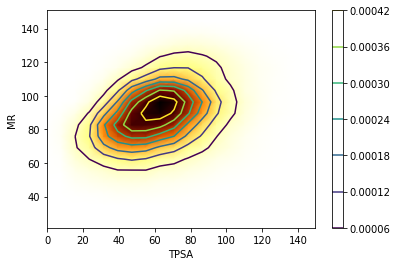

In [82]:
mf.bidiplot(np.asarray(Y[["tpsa","mr"]]), "TPSA","MR", d = True)

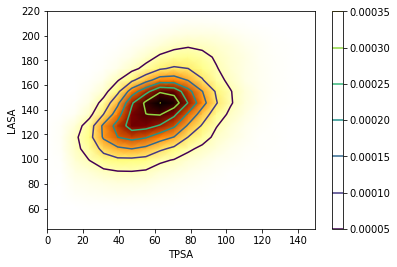

In [63]:
mf.bidiplot(np.asarray(Y[["tpsa","lasa"]]), "TPSA","LASA", d = True)

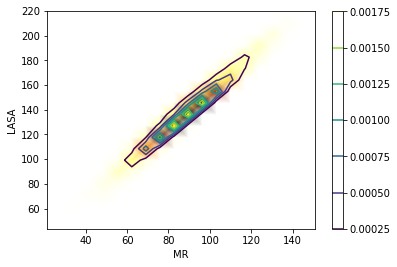

In [64]:
mf.bidiplot(np.asarray(Y[["mr","lasa"]]), "MR","LASA", d = True)

In [65]:
it = [300000]

df_un, cls_un = mf.wholean(it = it, name_train = "train", name_pref = "unc-")

Clustering time: 00:01:46
Diversity analysis time: 00:17:21
Clustering time: 00:00:01
Diversity analysis time: 00:00:30
Arenas creation time: 00:00:00
Novelty analysis time: 00:17:18


In [66]:
# Show the results in the output dataframe

df_un

,# train,%corr inp,# un train,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# un out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,300000.0,100.0,296753.0,198382.0,147006.0,255569.0,10000.0,99.35,9527.0,7552.0,5645.0,9008.0,13.81,48.38,67.95


In [67]:
# Save the results

df_un.to_csv("analysis1-exp5-un.csv")

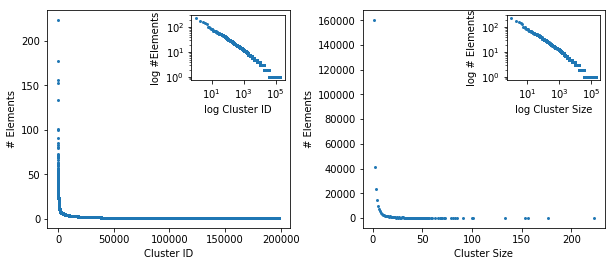

In [68]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus(cls_un, 10, 4)

In [69]:
def checkmr(m):
    try:
        return Descriptors.MolMR(m)
    except:
        pass


# 2D plot of TPSA vs MR vs LASA of output set
smis = mf.smif2smis('./unc-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['tpsa'] = smidf['mol'].apply(Descriptors.TPSA)
smidf['mr'] = smidf['mol'].apply(checkmr)
smidf['lasa'] = smidf['mol'].apply(Descriptors.LabuteASA)

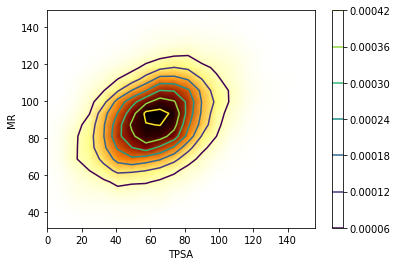

In [70]:
mf.bidiplot(np.asarray(smidf[['tpsa','mr']].dropna()), "TPSA","MR", d = True)

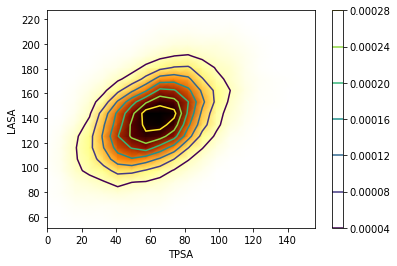

In [71]:
mf.bidiplot(np.asarray(smidf[['tpsa','lasa']].dropna()), "TPSA","LASA", d = True)

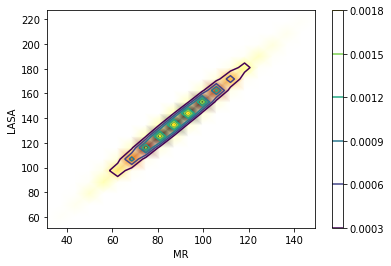

In [72]:
mf.bidiplot(np.asarray(smidf[['mr','lasa']].dropna()), "MR","LASA", d = True)

In [73]:
#######################################
### Conditional CMD output molecules
#######################################

df_co, cls_co = mf.wholean(it = it, name_train = "train", name_pref = "con-")

Clustering time: 00:01:48
Diversity analysis time: 00:14:44
Clustering time: 00:00:00
Diversity analysis time: 00:00:09
Arenas creation time: 00:00:00
Novelty analysis time: 00:13:42


In [74]:
# Show the results dataframe

df_co

,# train,%corr inp,# un train,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# un out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,300000.0,100.0,296753.0,198382.0,147006.0,255569.0,10000.0,97.99,3271.0,2370.0,1692.0,3027.0,43.53,55.26,91.74


In [75]:
# Save the results dataframe

df_co.to_csv("analysis1-exp5-co.csv")

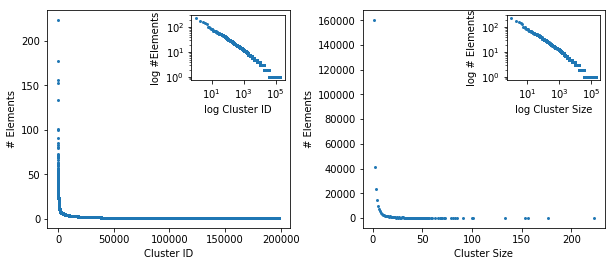

In [83]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co, 10, 4)

In [77]:
# 2D plot of TPSA vs MR vs LASA of output set
smis = mf.smif2smis('./con-300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['tpsa'] = smidf['mol'].apply(Descriptors.TPSA)
smidf['mr'] = smidf['mol'].apply(checkmr)
smidf['lasa'] = smidf['mol'].apply(Descriptors.LabuteASA)

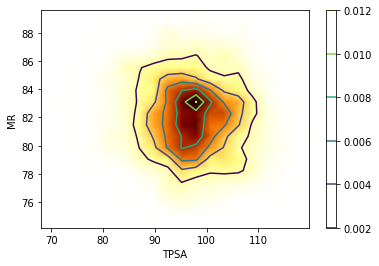

In [78]:
mf.bidiplot(np.asarray(smidf[['tpsa','mr']].dropna()), "TPSA","MR", d = True)

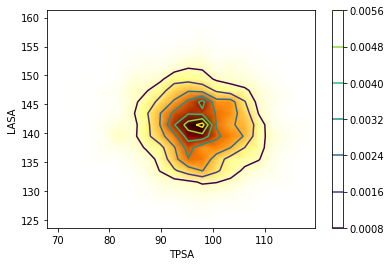

In [79]:
mf.bidiplot(np.asarray(smidf[['tpsa','lasa']].dropna()), "TPSA","LASA", d = True)

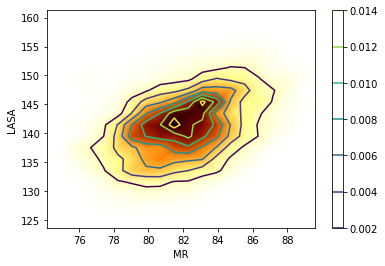

In [80]:
mf.bidiplot(np.asarray(smidf[['mr','lasa']].dropna()), "MR","LASA", d = True)

In [81]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp5Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Exp5Analysis execution time: 01:38:43
